In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.enrichment import *
import plotly.express as px
#from pymodulon.plotting import *
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
from scipy.stats import spearmanr, pearsonr
import seaborn as sns

In [2]:
ica_data = load_json_model('../data/yarrowia2025_fixed.json')

In [3]:
w29 = ica_data.sample_table[(ica_data.sample_table['project']=='Growth_Variance_W29')]
w29_gr = [0,0,0.1,0.1,0.15,0.15,0.2,0.2,0.25,0.25,0.3,0.3]
st = ica_data.sample_table[(ica_data.sample_table['project']=='Growth_Variance_ST8712')]
st_gr = [0.05,0.05,0.075,0.075,0.1,0.1,0.125,0.125,0.15,0.15]

growth_df = pd.DataFrame({'growth_rate': w29_gr}, index=ica_data.A[w29.index].columns)
df_merged = ica_data.A[w29.index].T.join(growth_df)
w29_A_gr = df_merged.groupby('growth_rate').mean().T


growth_df = pd.DataFrame({'growth_rate': st_gr}, index=ica_data.A[st.index].columns)
df_merged = ica_data.A[st.index].T.join(growth_df)
st_A_gr = df_merged.groupby('growth_rate').mean().T



In [4]:
st_A_gr

growth_rate,0.050,0.075,0.100,0.125,0.150
0,0.765496,1.414246,-3.302913e-15,0.281488,-1.733073
1,1.512759,8.890655,-1.776357e-15,-3.787054,-6.159762
2,-2.477572,-1.823074,-2.109424e-15,1.009417,4.349298
3,5.016511,1.870398,-2.942091e-15,0.172780,0.007829
4,9.752699,0.667155,1.110223e-15,-1.890784,-4.747622
5,-2.653692,-1.878482,3.344547e-15,-1.179182,-4.162244
6,-2.676906,-0.704605,1.332268e-15,4.230753,8.121095
7,-3.214826,-8.084000,1.998401e-15,3.002545,6.114633
8,1.951346,1.959895,-1.332268e-15,-1.797323,-2.377430
9,2.728163,1.790950,-5.828671e-16,0.280836,0.452597


In [5]:
# Compute Spearman correlation for each row
w29_correlations = []
st_correlations = []
w29_pvalues = []
st_pvalues = []


for idx, row in w29_A_gr.iterrows():
    corr, pval = spearmanr(row.values, row.index.tolist())
    w29_correlations.append(corr)
    w29_pvalues.append(pval)

w29_corr_df = pd.DataFrame({
    'iModulon': w29_A_gr.index,
    'Spearman_corr': w29_correlations,
    'p_value': w29_pvalues
})


w29_corr_df = w29_corr_df.sort_values(by='Spearman_corr', ascending=False).reset_index(drop=True)



for idx, row in st_A_gr.iterrows():
    corr, pval = spearmanr(row.values, row.index.tolist())
    st_correlations.append(corr)
    st_pvalues.append(pval)

# Create a result dataframe
st_corr_df = pd.DataFrame({
    'iModulon': st_A_gr.index,
    'Spearman_corr': st_correlations,
    'p_value': st_pvalues
})

# Optional: sort by correlation
st_corr_df = st_corr_df.sort_values(by='Spearman_corr', ascending=False).reset_index(drop=True)



In [6]:
w20_high_corrs = w29_corr_df[abs(w29_corr_df['Spearman_corr'])>0.95]

st_high_corrs = st_corr_df[abs(st_corr_df['Spearman_corr'])>0.95]

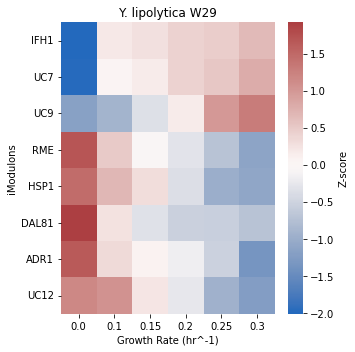

In [7]:
filtered_df_norm = (w29_A_gr.loc[w20_high_corrs['iModulon']]- w29_A_gr.loc[w20_high_corrs['iModulon']].mean(axis=1).values[:, None]) / w29_A_gr.loc[w20_high_corrs['iModulon']].std(axis=1).values[:, None]

# 5. Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(filtered_df_norm, cmap="vlag", center=0, cbar_kws={'label': 'Z-score'})
yticks = np.arange(len(filtered_df_norm.index))
ylabels = [ica_data.imodulon_table.loc[w]['iModulon Name'] for w in filtered_df_norm.index]
plt.yticks(yticks+0.5,ylabels,rotation=0)
plt.title("Y. lipolytica W29")
plt.xlabel("Growth Rate (hr^-1)")
plt.ylabel("iModulons")
plt.tight_layout()
plt.show()


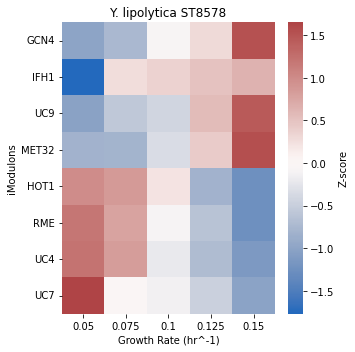

In [8]:
filtered_df_norm = (st_A_gr.loc[st_high_corrs['iModulon']]- st_A_gr.loc[st_high_corrs['iModulon']].mean(axis=1).values[:, None]) / st_A_gr.loc[st_high_corrs['iModulon']].std(axis=1).values[:, None]

# 5. Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(filtered_df_norm, cmap="vlag", center=0, cbar_kws={'label': 'Z-score'})
yticks = np.arange(len(filtered_df_norm.index))
ylabels = [ica_data.imodulon_table.loc[w]['iModulon Name'] for w in filtered_df_norm.index]
plt.yticks(yticks+0.5,ylabels,rotation=0)
plt.title("Y. lipolytica ST8578")
plt.xlabel("Growth Rate (hr^-1)")
plt.ylabel("iModulons")
plt.tight_layout()
plt.show()


In [9]:
ica_data.view_imodulon(8)[abs(ica_data.view_imodulon(8)['gene_weight'])>0.1]

,gene_weight,accession,source,feature,start,end,score,strand,phase,attributes,...,sacc_gene_product,COG_category,Description,Preferred_name,GOs,PFAMs,KEGG_Pathway,KEGG_Module,BRITE,regulator


Trade offs with IFH1

In [10]:
# Compute Spearman correlation for each row
im_correlations = []
im_pvalues = []


for im in ica_data.A.index.tolist():
    corr, pval = spearmanr(ica_data.A.loc[24], ica_data.A.loc[im])
    im_correlations.append(corr)
    im_pvalues.append(pval)

im_corr_df = pd.DataFrame({
    'iModulon': ica_data.A.index,
    'Pearson_corr': im_correlations,
    'p_value': im_pvalues
})


im_corr_df = im_corr_df.sort_values(by='Pearson_corr', ascending=True).reset_index(drop=True)

In [11]:
im_corr_df

,iModulon,Pearson_corr,p_value
0,27,-0.743129,7.481791e-23
1,15,-0.606822,1.010261e-13
2,13,-0.464924,6.042815e-08
3,2,-0.454999,1.242399e-07
4,7,-0.437193,4.280976e-07
5,18,-0.334492,1.559884e-04
6,20,-0.293850,9.709068e-04
7,5,-0.233384,9.379426e-03
8,22,-0.201403,2.549582e-02
9,14,-0.181450,4.458637e-02
